# Dataloader from semantic_segmentation folder

In [1]:
# Utils
import logging
import os

import torch

import numpy as np
import matplotlib.pyplot as plt

# Torch
import torchvision.transforms as transforms

# DeepDIVA
from datasets.image_folder_segmentation import load_dataset
from datasets.custom_transform_library import transforms as custom_transforms
from template.setup import _load_mean_std_from_file

###  Load GlaS dataset

In [2]:
from template.runner.semantic_segmentation.setup import set_up_dataloaders

train_loader, val_loader, test_loader  = set_up_dataloaders(model_expected_input_size = (254,254), 
                                                           dataset_folder = "/home/sven/Desktop/data/GlaS_small", 
                                                           batch_size = 4, 
                                                           workers = 1,
                                                           disable_dataset_integrity=False, 
                                                           enable_deep_dataset_integrity=True, 
                                                           inmem=False, 
                                                           runner_class = "semantic_segmentation",
                                                           imgs_in_memory = 5, 
                                                           crop_size = 256,
                                                           crops_per_image = 10)

In [3]:
len(train_loader)

25

In [4]:
batch = next(iter(train_loader))

In [5]:
batch[0].shape

torch.Size([4, 3, 256, 256])

In [6]:
batch[1].shape

torch.Size([4, 256, 256])

### show shape of glas data with data loader

Text(0.5, 1.0, 'torch.Size([256, 256])')

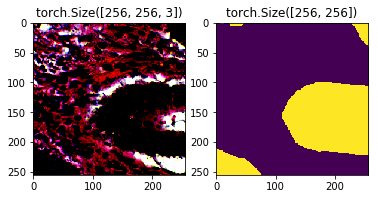

In [7]:
%matplotlib inline

f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.transpose(batch[0][0], (1,2,0)))
axarr[0].set_title(np.shape(np.transpose(batch[0][1], (1,2,0))))
axarr[1].imshow(batch[1][0])
axarr[1].set_title(np.shape(batch[1][1]))

### show shape of the raw files from glas data (WITHOUT Dataloader)

dtype: uint8
max: 255
min: 9

dtype: uint8
max: 2
min: 0
[1 2]


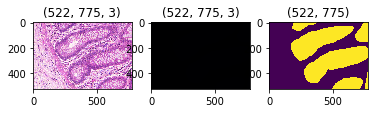

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline
imgPIL = Image.open("/home/sven/Desktop/data/GlaS_small/test/data/testB_5.bmp")
maskPIL = Image.open("/home/sven/Desktop/data/GlaS_small/test/gt/testB_5.bmp")
a = np.array(maskPIL)

a1 = np.array(imgPIL)
a2 = np.array(maskPIL)

print("dtype:", a1.dtype)
print("max:", a1.max())
print("min:", a1.min())
print()
print("dtype:", a2.dtype)
print("max:", a2.max())
print("min:", a2.min())


f, axarr = plt.subplots(1,3)
axarr[0].imshow(imgPIL)
axarr[0].set_title(np.shape(imgPIL))
axarr[1].imshow(a)
axarr[1].set_title(np.shape(a))

# the masks are encoded in the blue channel !!!
axarr[2].imshow(a[:,:,2])
axarr[2].set_title(np.shape(a[:,:,2]))

print(np.unique(a2[:,:,2]))



### show shape of new images WITHOUT dataloader

dtype: uint8
max: 255
min: 0

dtype: uint8
max: 2
min: 0
[1 2]


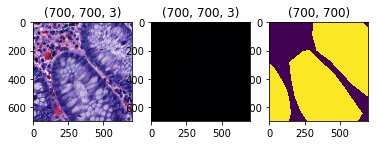

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline
imgPIL = Image.open("/home/sven/Desktop/data/new_data/patch1_img.bmp")
maskPIL = Image.open("/home/sven/Desktop/data/new_data/patch1_mask.bmp")
a = np.array(maskPIL)

a1 = np.array(imgPIL)
a2 = np.array(maskPIL)

print("dtype:", a1.dtype)
print("max:", a1.max())
print("min:", a1.min())
print()
print("dtype:", a2.dtype)
print("max:", a2.max())
print("min:", a2.min())


f, axarr = plt.subplots(1,3)
axarr[0].imshow(imgPIL)
axarr[0].set_title(np.shape(imgPIL))
axarr[1].imshow(a)
axarr[1].set_title(np.shape(a))

# the masks are encoded in the blue channel !!!
axarr[2].imshow(a[:,:,2])
axarr[2].set_title(np.shape(a[:,:,2]))

print(np.unique(a2[:,:,2]))

### Load new data with dataloader

In [9]:
from template.runner.semantic_segmentation.setup import set_up_dataloaders

train_loader, val_loader, test_loader  = set_up_dataloaders(model_expected_input_size = (254,254), 
                                                           dataset_folder = "/home/sven/Desktop/data/new_data/DeepDIVA_folder_structure", 
                                                           batch_size = 4, 
                                                           workers = 1,
                                                           disable_dataset_integrity=False, 
                                                           enable_deep_dataset_integrity=True, 
                                                           inmem=False, 
                                                           runner_class = "semantic_segmentation",
                                                           imgs_in_memory = 5, 
                                                           crop_size = 10,
                                                           crops_per_image = 10)

In [7]:
len(train_loader)

15

#### extract a batch (images + masks)

In [8]:
batch = next(iter(train_loader))

KeyError: 'Traceback (most recent call last):\n  File "/home/sven/anaconda3/envs/deepdiva/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop\n    samples = collate_fn([dataset[i] for i in batch_indices])\n  File "/home/sven/anaconda3/envs/deepdiva/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>\n    samples = collate_fn([dataset[i] for i in batch_indices])\n  File "/home/sven/PycharmProjects/DeepDIVA-Private-segmentation_original/datasets/image_folder_segmentation.py", line 286, in __getitem__\n    return self._get_train_val_items()\n  File "/home/sven/PycharmProjects/DeepDIVA-Private-segmentation_original/datasets/image_folder_segmentation.py", line 310, in _get_train_val_items\n    self.gt_img_inmem[self.image_bundle_order[self.current_number_of_crops]])\n  File "/home/sven/PycharmProjects/DeepDIVA-Private-segmentation_original/datasets/image_folder_segmentation.py", line 392, in apply_transformation\n    gt = self.gt_transform(gt)\n  File "/home/sven/anaconda3/envs/deepdiva/lib/python3.7/site-packages/torchvision/transforms/transforms.py", line 60, in __call__\n    img = t(img)\n  File "/home/sven/PycharmProjects/DeepDIVA-Private-segmentation_original/datasets/custom_transform_library/transforms.py", line 79, in __call__\n    return F_custom.gt_to_one_hot(gt, self.class_encodings)\n  File "/home/sven/PycharmProjects/DeepDIVA-Private-segmentation_original/datasets/custom_transform_library/functional.py", line 97, in gt_to_one_hot\n    [[replace_dict[im_np[i, j]] for j in range(im_np.shape[1])] for i in range(im_np.shape[0])]).astype(\n  File "/home/sven/PycharmProjects/DeepDIVA-Private-segmentation_original/datasets/custom_transform_library/functional.py", line 97, in <listcomp>\n    [[replace_dict[im_np[i, j]] for j in range(im_np.shape[1])] for i in range(im_np.shape[0])]).astype(\n  File "/home/sven/PycharmProjects/DeepDIVA-Private-segmentation_original/datasets/custom_transform_library/functional.py", line 97, in <listcomp>\n    [[replace_dict[im_np[i, j]] for j in range(im_np.shape[1])] for i in range(im_np.shape[0])]).astype(\nKeyError: 2\n'

####  images 

In [ ]:
batch[0].shape

#### masks

In [ ]:
batch[1].shape

In [ ]:
np.shape(batch[0][0])

In [ ]:
plt.imshow(batch[0][0])
plt.show()

### load best model ??

In [ ]:
from template.setup import set_up_model

In [ ]:
model, criterion, optimizer, best_value = set_up_model(output_channels = 8, model_name = "unet", pretrained = True, no_cuda = False, 
             resume = "/home/sven/Segmentation/results/unet_unifr_cluster/02-12-19-19h-42m-34s/checkpoint.pth.tar",
             load_model = "/home/sven/Segmentation/results/unet_unifr_cluster/02-12-19-19h-42m-34s/model_best.pth.tar", 
             disable_databalancing = True, 
             dataset_folder = "/home/sven/Desktop/GlaS/test/data/testB_1.png",
             inmem=False, workers=4, optimizer_name="SGD", criterion_name="CrossEntropyLoss", num_classes=2, ablate=False, lr= 0.01)

#### pass a batch through the network

In [ ]:
pred = model(batch[0])
pred_detach = pred.detach()
pred_cpu = pred_detach.cpu()
pred_array = np.array(pred_cpu)

#### plot the first prediction of the network

In [ ]:
pred_array[0][0].shape

In [ ]:
%matplotlib inline

#plt.imshow(pred_array[0][1])
plt.imshow(pred_array[0][0])
plt.show()

#### plot the orignal image

In [ ]:
np.array(batch[0][0]).shape

In [ ]:
original_image = batch[0][0]
original_image = np.array(original_image)
plt.imshow(np.transpose(original_image, (1,2,0)))
plt.show()

#### plot mask

In [ ]:
plt.imshow(np.array(batch[1][0]))
plt.show()

### Define softmax function (can not import softmax and crf function) 

In [ ]:
def softmax(X, theta = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.
    Parameters
    ----------
    X: ND-Array. Probably should be floats.
    theta (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the
        first non-singleton axis.
    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter,
    y = y * float(theta)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)

    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p


### Show original image

In [ ]:
original_image = np.array(batch[0][0])
print("original_image: max:", original_image.max(), "min:", original_image.min())
print(np.shape(original_image))

#### required shape of original image

In [ ]:
original_image = np.transpose(original_image, (1,2,0))
original_image.shape

### show output

In [ ]:
output = pred_array[0]
output
print("output: max:", output.max(), "min:", output.min())
print(np.shape(output))

## crf

In [ ]:
import numpy as np

"""
Function which returns the labelled image after applying CRF
adapted from https://github.com/lucasb-eyer/pydensecrf/tree/master/pydensecrf.
"""
nb_iterations=1
sxy1=(3, 3)
sxy2=(80, 80)
compat=3
srgb=(13, 13, 13)


"""
Parameters explained https://github.com/lucasb-eyer/pydensecrf
Parameters
----------
original_image : H x W x RGB
     [0:255]
output : C x H x W
    float confidence of the network
Returns
-------
H x W
    map of the selected labels, [0..C] where C is the number of classes
"""
import pydensecrf.densecrf as dcrf
from pydensecrf.utils import unary_from_softmax

original_image = original_image.astype(np.uint8)
print("original_image: max:", original_image.max(), "min:", original_image.min())
print(np.shape(original_image))


# The output needs to be between 0 and 1
if np.max(output) > 1 or np.min(output) < 0:
    output = softmax(output, axis=0)
print("output: max:", output.max(), "min:", output.min())
print(np.shape(output))


# Make the array contiguous in memory
output = output.copy(order='C')
print("output: max:", output.max(), "min:", output.min())
print(np.shape(output))




In [ ]:


f, axarr = plt.subplots(1,2)
axarr[0].imshow(original_image)
axarr[1].imshow(np.transpose(output, (1,2,0))[:,:,1])

In [ ]:
d = dcrf.DenseCRF2D(original_image.shape[1], original_image.shape[0], output.shape[0])
print(d)
print(original_image.shape[1], original_image.shape[0],output.shape[0])
U = unary_from_softmax(output)
print(U.shape)
d.setUnaryEnergy(U)

d.addPairwiseGaussian(sxy=sxy1, 
                      compat=compat, 
                      kernel=dcrf.DIAG_KERNEL, 
                      normalization=dcrf.NORMALIZE_SYMMETRIC)

#### I had to add this line, otherwise there is an error

In [ ]:
original_image = original_image.copy(order='C')

In [ ]:
# This adds the color-dependent term, i.e. features are (x,y,r,g,b).
# im is an image-array, e.g. im.dtype == np.uint8 and im.shape == (640,480,3)
d.addPairwiseBilateral(sxy=sxy2,
                       srgb=srgb,
                       rgbim=original_image,
                       compat=compat*3,
                       kernel=dcrf.DIAG_KERNEL,
                       normalization=dcrf.NORMALIZE_SYMMETRIC)
Q = d.inference(nb_iterations)

labeled_image = np.argmax(Q, axis=0).reshape(original_image.shape[0], original_image.shape[1])

In [ ]:

pred = np.argmax(output, axis=0)
mask = np.array(batch[1][0])

In [ ]:
f, axarr = plt.subplots(1,3)

axarr[0].imshow(labeled_image, )
axarr[0].set_title('labeled_image (CRF)')
axarr[1].imshow(pred)
axarr[1].set_title('pred (argmax)')
axarr[2].imshow(mask)
axarr[2].set_title('mask')


#### what is class_encodings ????

In [ ]:
from template.runner.semantic_segmentation.setup import output_to_class_encodings

output_encoded = output_to_class_encodings(output, class_encodings)

##  Prediction multiple images

In [ ]:
from tqdm import tqdm
from util.misc import AverageMeter
import time

data_time = AverageMeter()
end = time.time()
no_cuda = True

pbar = tqdm(enumerate(train_loader), total=len(train_loader), unit='batch', ncols=150, leave=False)
for batch_idx, (input, target) in pbar:
    # Measure data loading time
    data_time.update(time.time() - end)
    
            # Moving data to GPU
    if not no_cuda:
        input = input.cuda(non_blocking=True)
        target = target.cuda(non_blocking=True)
    
    print(input.shape)
    output = model(input)
    



In [ ]:
output = output.detach()

In [ ]:
output_cpu = output.cpu()

In [ ]:
output_array = np.array(output_cpu)

In [ ]:
output_array.shape

In [ ]:
output_array[1,:,:,:].shape

In [ ]:
output_one_img = output_array[1,:,:,:]

In [ ]:
output_one_img.shape

In [ ]:
output_one_channel = output_one_img[0,:,:]

In [ ]:
plt.imshow(output_one_channel)
plt.show()

In [ ]:
new = output_one_img.transpose(1,2,0)

In [ ]:
prediction = np.argmax(output.cpu(), axis=0)

In [ ]:
prediction.shape

In [ ]:
prediction_array = np.array(prediction)

In [ ]:
plt.imshow(prediction_array[0,:,:])
plt.show()

In [ ]:
plt.imshow(prediction_array[1,:,:])
plt.show()

In [ ]:
original_image_tensor = batch[0][3]

In [ ]:
original_image_tensor.shape

In [ ]:
original_image_tensor = batch[0][3]
plt.imshow(np.transpose(np.array(original_image_tensor), (1,2,0)))

In [ ]:
prediction = crf(original_image, outpu)

In [ ]:
import skimage

In [ ]:
#new = skimage.transform.resize(output_one_img, (256, 256, 3))
#np.shape(new)

In [ ]:
output_one_img

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(new.astype('uint8'))
plt.show()

## Dataloader from template.setup

In [ ]:
from template.setup import set_up_dataloaders
data_loader = set_up_dataloaders(model_expected_input_size = (254,254), 
                                                           dataset_folder = "/home/sven/Desktop/data/GlaS_small", 
                                                           batch_size = 4, 
                                                           workers = 1,
                                                           disable_dataset_integrity=False, 
                                                           enable_deep_dataset_integrity=True, 
                                                           inmem=False, 
                                                           runner_class = "semantic_segmentation",
                                                           imgs_in_memory = 5, 
                                                           crop_size = 256,
                                                           crops_per_image = 10)

train_loader = data_loader[0]
val_loader = data_loader[1]
test_loader = data_loader[2]

len(train_loader)
batch = next(iter(train_loader))

img = batch.__getitem__(0)[0]
print(type(img))
print(img.shape)

img_array = np.array(img)
print(type(img))
print(img.shape)

plt.imshow(np.transpose(img_array,(1, 2, 0)))
plt.show()

### changes RGBA to RGB (only necessary if you save the images with matplotlib)

In [ ]:
### the new images were saved in RGBA and not RGB, that is not true any more

from PIL import Image

png = Image.open("/home/sven/Desktop/data/new_data/patch1_mask.png")
png.load() # required for png.split()
print(np.shape(png))

background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

print(np.shape(background))
plt.imshow(background)
plt.show()

#background.save('foo.jpg', 'JPEG', quality=80)